In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import statistics as st
import arviz as az
import bambi as bmb
import pymc as pm
from pymc import HalfNormal, Model, Normal, sample
import networkx as nx
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 12345
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

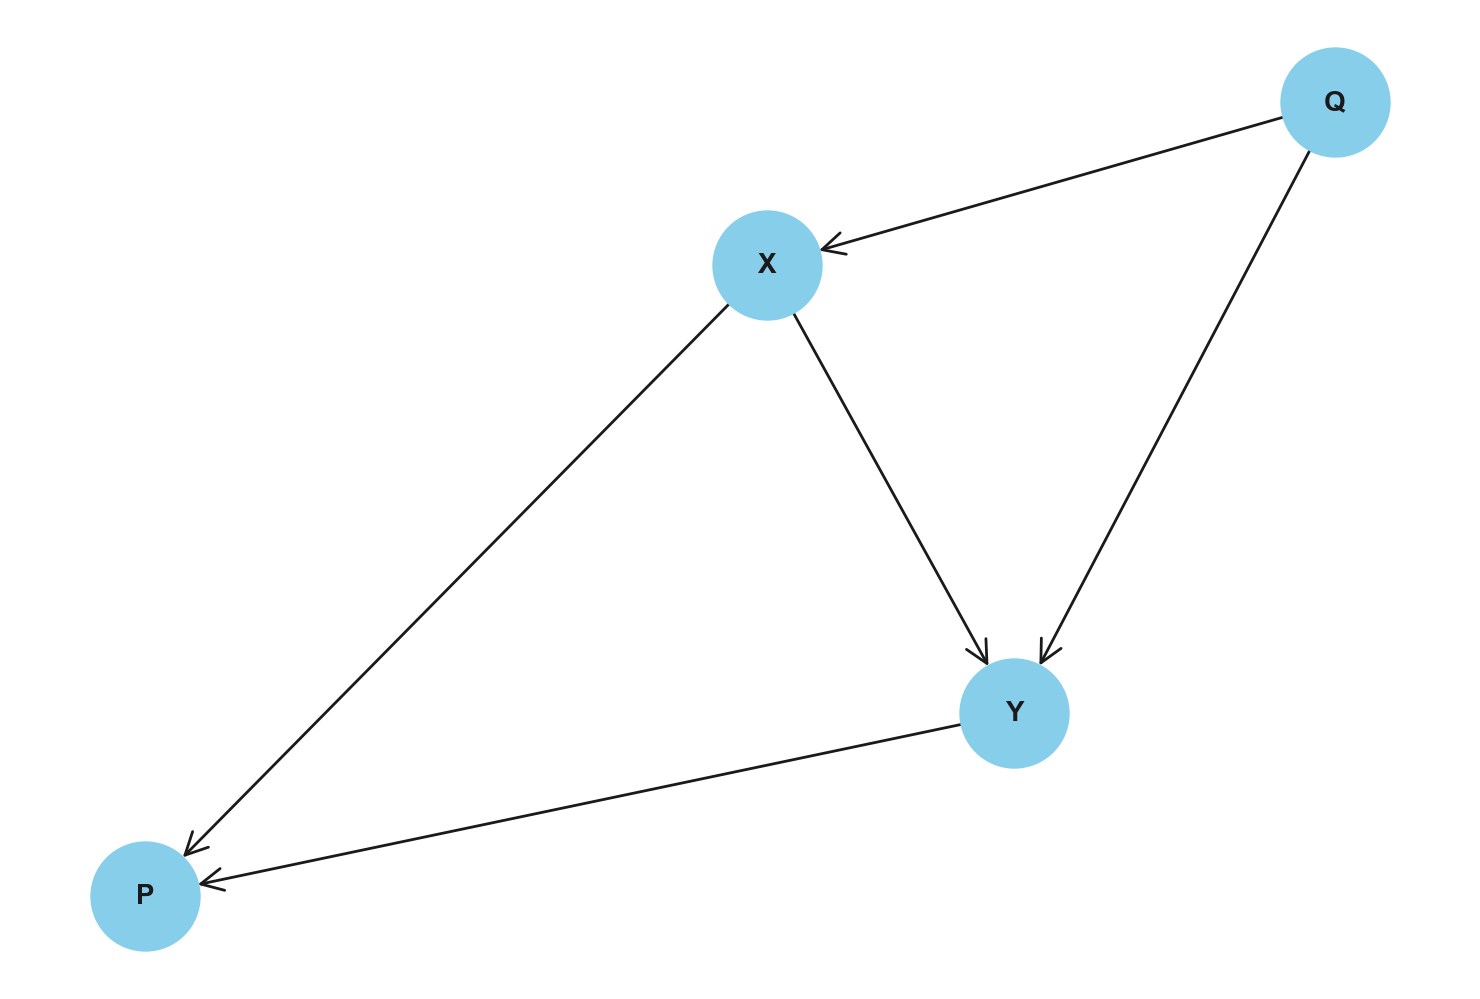

In [3]:
graph = nx.DiGraph()
#graph.add_edges_from([("root", "a"), ("a", "b"), ("a", "e"), ("b", "c"), ("b", "d"), ("d", "e")])
graph.add_edges_from([("X", "Y"), ("X", "P"), ("Y", "P"), ("Q", "X"), ("Q", "Y")])

# Draw the graph
pos = nx.spring_layout(graph, seed=42)  # Position nodes using spring layout algorithm
nx.draw(graph, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=20, arrowstyle="->")
plt.show()

In [4]:
N = 5_000
Q = rng.normal(size=N)
X = rng.normal(loc=0.14*Q, scale=0.4, size=N)
Y = rng.normal(loc=0.7*X + 0.11*Q, scale=0.24, size=N)
P = rng.normal(loc=0.43*X + 0.21*Y, scale=0.22, size=N)
df = pd.DataFrame({"Q": Q, "X": X, "Y": Y, "P": P})

df.head()

,Q,X,Y,P
0,-1.423825,-0.421305,-0.498653,0.039523
1,1.263728,0.518683,0.576752,0.059713
2,-0.870662,0.354544,0.157422,0.367875
3,-0.259173,0.135539,0.307791,0.016444
4,-0.075343,-0.048982,0.114759,0.134512


In [5]:
model = bmb.Model("Y ~ X", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.688441


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:  35%|██████████████████▌                                  | 700/2000 [00:01<00:00, 6826.49it/s]

Running chain 1:  35%|██████████████████▌                                  | 700/2000 [00:01<00:00, 6611.33it/s]

Running chain 3:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7475.16it/s]

Running chain 2:  50%|██████████████████████████                          | 1000/2000 [00:01<00:00, 9245.91it/s]

Running chain 3:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 8912.26it/s]

Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 9625.45it/s]

Running chain 0:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 8880.10it/s]

Running chain 1:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 8636.22it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1205.18it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1206.33it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1207.35it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1208.25it/s]


Sampling time = 0:00:01.880866


Transforming variables...


Transformation time = 0:00:00.064598


Computing Log Likelihood...


Log Likelihood time = 0:00:00.248039


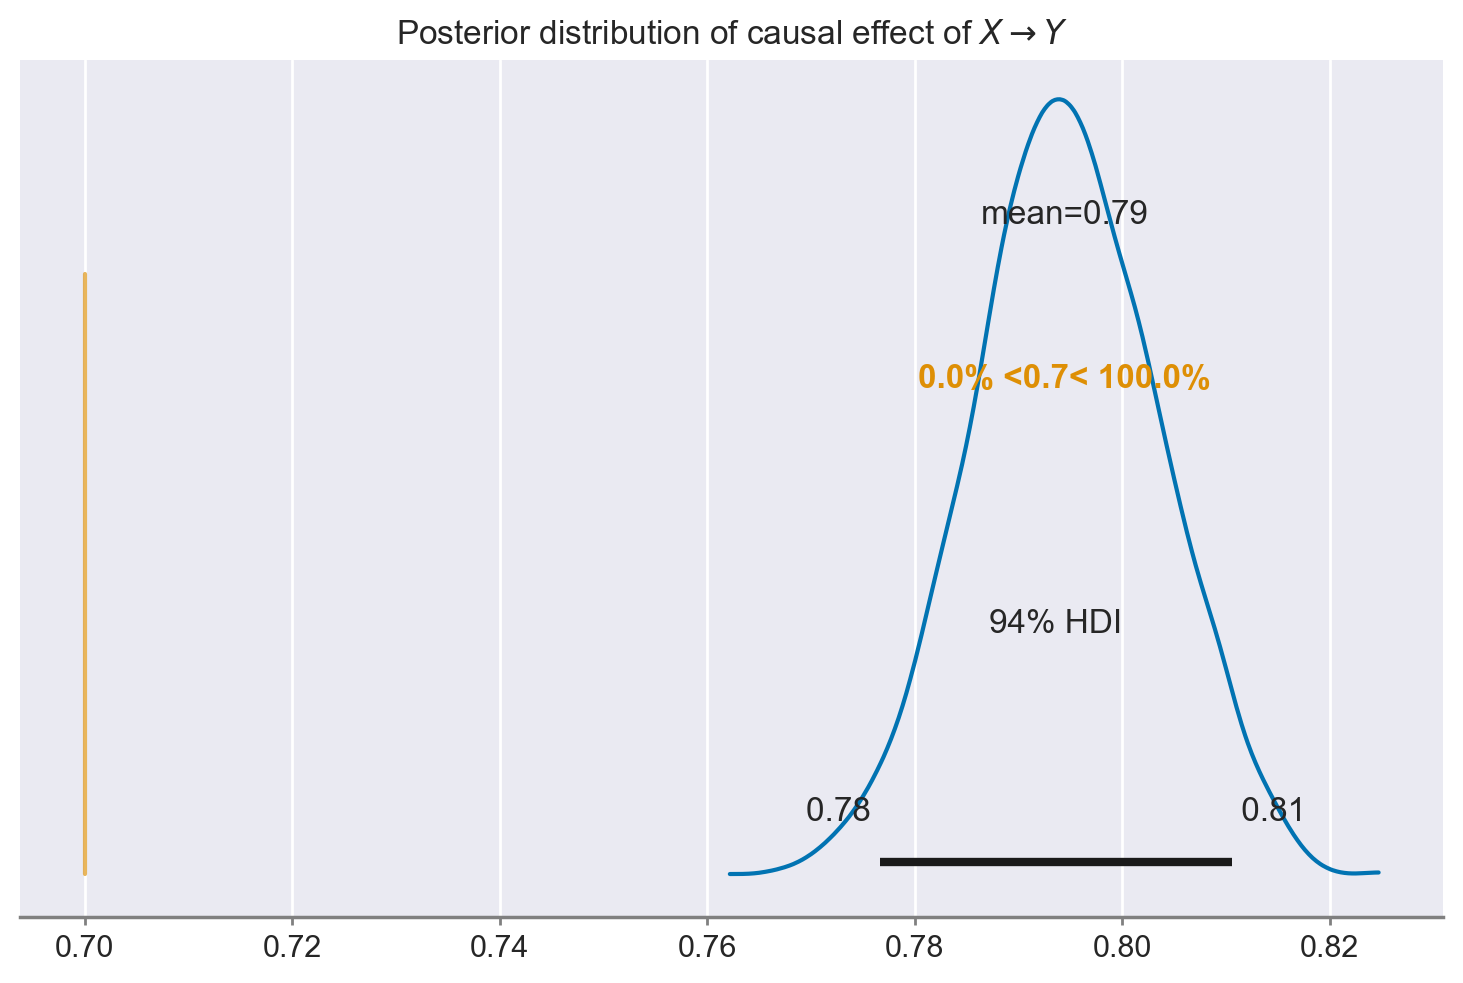

In [6]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [7]:
model = bmb.Model("Y ~ Q + X + P", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.852608


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3964.57it/s]

Running chain 1:  15%|███████▉                                             | 300/2000 [00:01<00:00, 2825.55it/s]

Running chain 2:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3678.50it/s]

Running chain 3:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3618.46it/s]

Running chain 0:  50%|██████████████████████████                          | 1000/2000 [00:01<00:00, 5129.43it/s]

Running chain 2:  50%|██████████████████████████                          | 1000/2000 [00:01<00:00, 4812.08it/s]

Running chain 1:  50%|██████████████████████████                          | 1000/2000 [00:01<00:00, 4777.19it/s]

Running chain 3:  55%|████████████████████████████▌                       | 1100/2000 [00:01<00:00, 5154.62it/s]

Running chain 0:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 5219.49it/s]

Running chain 1:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 5231.75it/s]

Running chain 3:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 5742.82it/s]

Running chain 2:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 4903.92it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 982.81it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 983.25it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 983.81it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 984.42it/s]

Sampling time = 0:00:02.128270


Transforming variables...


Transformation time = 0:00:00.052757


Computing Log Likelihood...


Log Likelihood time = 0:00:00.257260


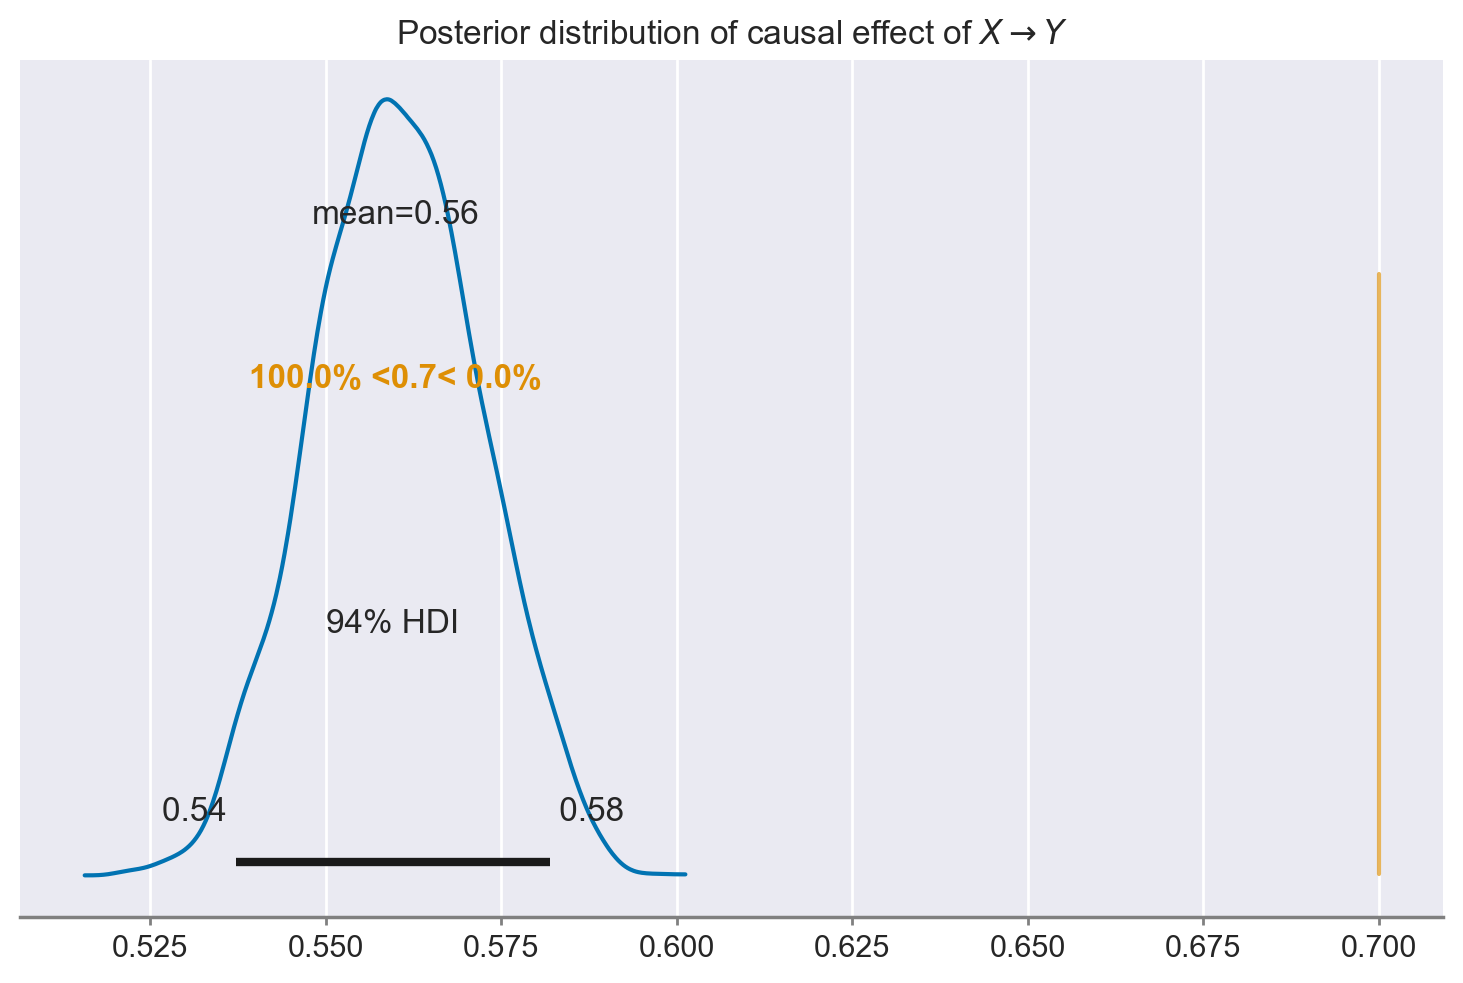

In [8]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [9]:
model = bmb.Model("Y ~ X + Q", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.656393


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4845.28it/s]

Running chain 0:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4731.70it/s]

Running chain 1:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4696.42it/s]

Running chain 3:  30%|███████████████▉                                     | 600/2000 [00:01<00:00, 5498.98it/s]

Running chain 0:  65%|█████████████████████████████████▊                  | 1300/2000 [00:01<00:00, 6556.67it/s]

Running chain 2:  65%|█████████████████████████████████▊                  | 1300/2000 [00:01<00:00, 6433.85it/s]

Running chain 1:  65%|█████████████████████████████████▊                  | 1300/2000 [00:01<00:00, 6375.62it/s]

Running chain 3:  70%|████████████████████████████████████▍               | 1400/2000 [00:01<00:00, 6759.02it/s]

Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 6478.79it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1119.86it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1120.39it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1121.06it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1121.81it/s]


Sampling time = 0:00:01.871533


Transforming variables...


Transformation time = 0:00:00.044151


Computing Log Likelihood...


Log Likelihood time = 0:00:00.188404


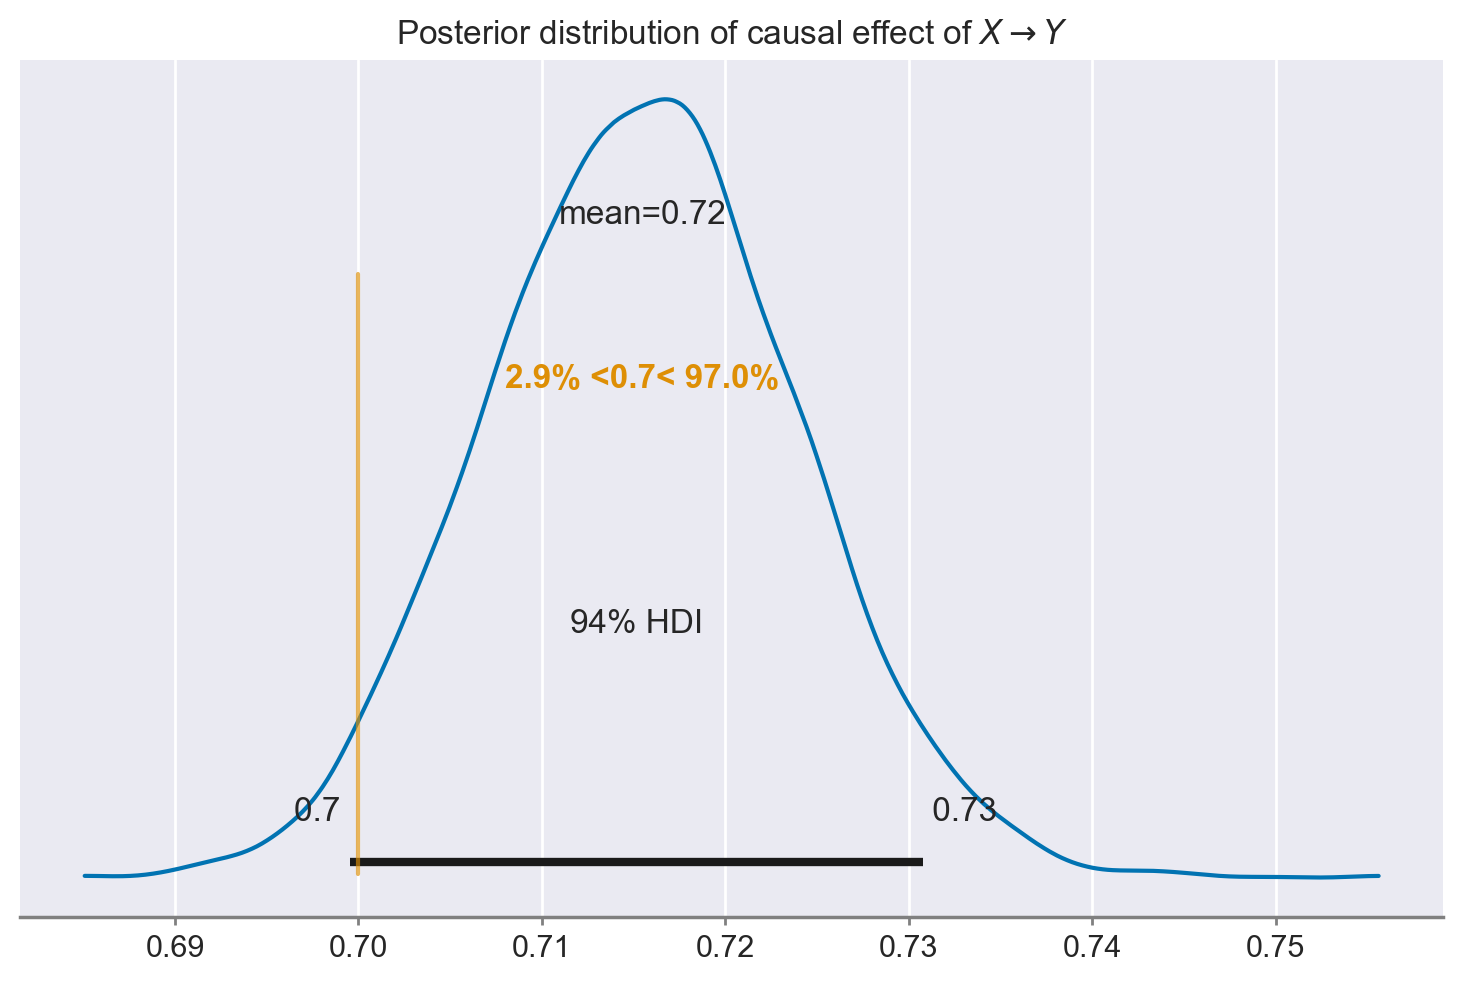

In [10]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

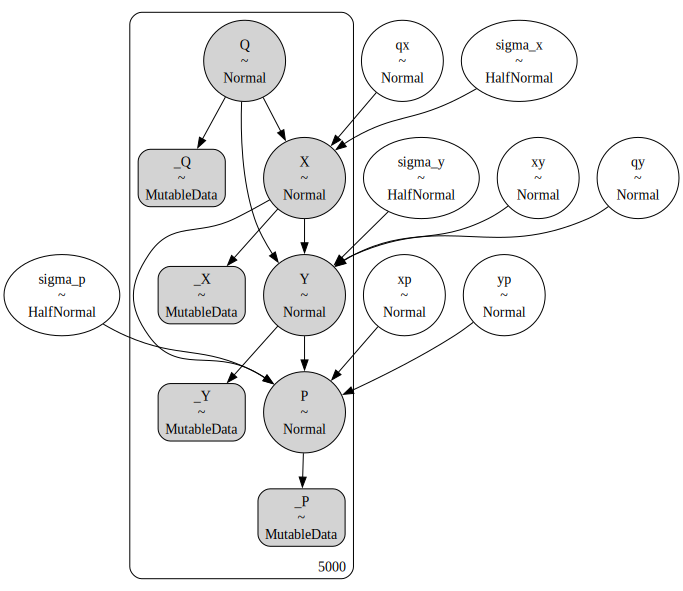

In [11]:
with pm.Model() as model:
    # data
    _Q = pm.MutableData("_Q", df["Q"])
    _X = pm.MutableData("_X", df["X"])
    _Y = pm.MutableData("_Y", df["Y"])
    _P = pm.MutableData("_P", df["P"])

    # priors on slopes
    # x ~ q
    qx = pm.Normal("qx")
    # y ~ x + q
    xy = pm.Normal("xy")
    qy = pm.Normal("qy")
    # p ~ x + y
    xp = pm.Normal("xp")
    yp = pm.Normal("yp")

    # priors on sd's
    sigma_x = pm.HalfNormal("sigma_x")
    sigma_y = pm.HalfNormal("sigma_y")
    sigma_p = pm.HalfNormal("sigma_p")
    
    # model
    Q = pm.Normal("Q", observed=_Q)
    X = pm.Normal("X", mu=qx*Q, sigma=sigma_x, observed=_X)
    Y = pm.Normal("Y", mu=xy*X + qy*Q, sigma=sigma_y, observed=_Y)
    P = pm.Normal("P", mu=xp*X + yp*Y, sigma=sigma_p, observed=_P)

pm.model_to_graphviz(model)

In [12]:
with model:
    idata = pm.sampling_jax.sample_numpyro_nuts(idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.063993


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 1:  10%|█████▎                                               | 200/2000 [00:02<00:01, 1131.91it/s]

Running chain 0:  10%|█████▎                                               | 200/2000 [00:02<00:01, 1101.02it/s]

Running chain 3:  10%|█████▍                                                | 200/2000 [00:02<00:01, 969.17it/s]

Running chain 2:  10%|█████▍                                                | 200/2000 [00:02<00:01, 915.72it/s]

Running chain 1:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1459.82it/s]

Running chain 0:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1415.76it/s]

Running chain 3:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1349.78it/s]

Running chain 2:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1306.22it/s]

Running chain 0:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1568.72it/s]

Running chain 3:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1526.50it/s]

Running chain 1:  35%|██████████████████▌                                  | 700/2000 [00:02<00:00, 1762.47it/s]

Running chain 2:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1533.73it/s]

Running chain 0:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1840.18it/s]

Running chain 2:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1854.35it/s]

Running chain 3:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1821.96it/s]

Running chain 1:  50%|██████████████████████████                          | 1000/2000 [00:02<00:00, 1928.36it/s]

Running chain 2:  55%|████████████████████████████▌                       | 1100/2000 [00:02<00:00, 1875.24it/s]

Running chain 1:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 1936.17it/s]

Running chain 0:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 1948.22it/s]

Running chain 3:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 1947.94it/s]

Running chain 2:  65%|█████████████████████████████████▊                  | 1300/2000 [00:02<00:00, 1911.51it/s]

Running chain 1:  75%|███████████████████████████████████████             | 1500/2000 [00:02<00:00, 1984.36it/s]

Running chain 0:  75%|███████████████████████████████████████             | 1500/2000 [00:02<00:00, 2038.75it/s]

Running chain 3:  75%|███████████████████████████████████████             | 1500/2000 [00:02<00:00, 2049.89it/s]

Running chain 2:  75%|███████████████████████████████████████             | 1500/2000 [00:02<00:00, 1885.84it/s]

Running chain 0:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:02<00:00, 2020.05it/s]

Running chain 1:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:02<00:00, 2005.13it/s]

Running chain 3:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:02<00:00, 2069.45it/s]

Running chain 2:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:02<00:00, 1897.90it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 2089.33it/s]

Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 1973.58it/s]

Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 1967.17it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 635.55it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 635.73it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 635.96it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 636.22it/s]


Sampling time = 0:00:03.253618


Transforming variables...


Transformation time = 0:00:00.068749


Computing Log Likelihood...


Log Likelihood time = 0:00:00.807090


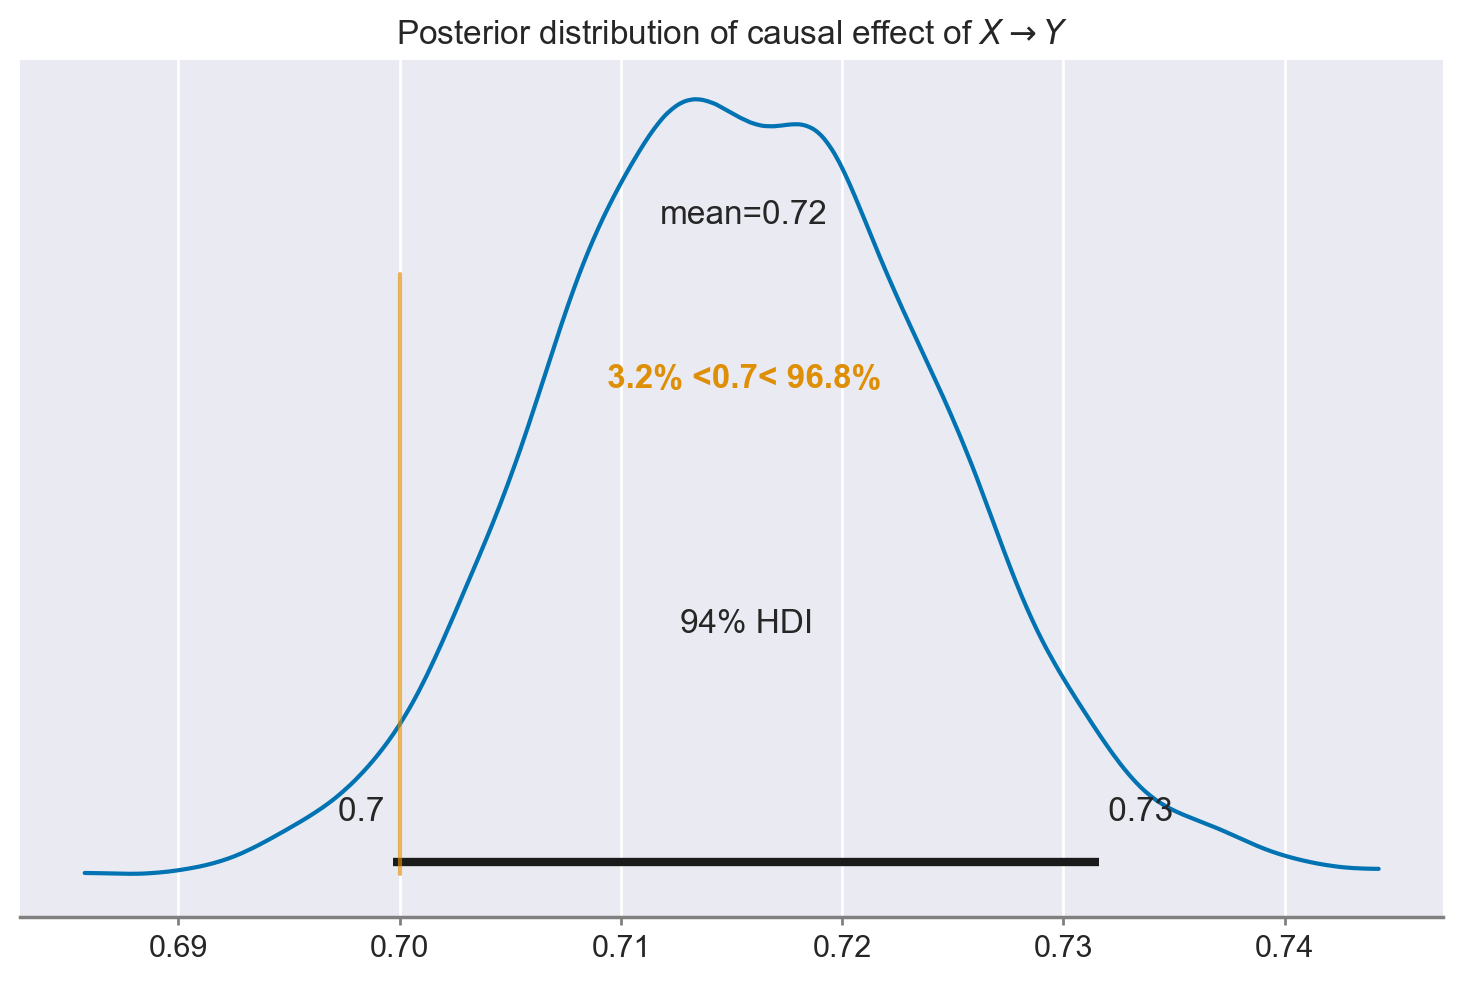

In [13]:
ax = az.plot_posterior(idata, var_names="xy", ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [14]:
%run ../wm.py

Watermark:
----------
Last updated: 2024-01-26T19:01:09.151991+01:00

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit


